## Twitter Account Classification Using Account Metadata: <br/> Organization vs. Individual

This notebook is an interactive demo of the study *Twitter Account Classification Using Account Metadata: Organization vs. Individual*. It downloads the model trained on Demographer full dataset and visualizes the prediction of the given account. Run the code cells one by one. After the model is ready, do not have to execute the install and download cells again. 

---
Some accounts containing different languages:

```
un
potus
kfc
bmwdeutschland
kann_news
lemondefr
onu_derechos
rianru
GiuseppeConteIT
```






In [ ]:
#@title Install required packages
#@markdown Run this cell to install all required packages only for the first time.
#@markdown It will restart the runtime automatically after installation is done. Wait until runtime restart.
%%capture
%reload_ext autoreload
%autoreload 2
import os 
!pip install -qq tensorflow==2.2.0
!pip install -qq sentencepiece
!pip install -qq --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

os.kill(os.getpid(), 9)

In [1]:
#@title Download pre-trained model
#@markdown Run this cell to download pre-trained model only for the first time.
#@markdown Outputs are disabled so wait until cell run is completed.
%%capture
import os
import nest_asyncio
from google_drive_downloader import GoogleDriveDownloader as gdd
nest_asyncio.apply()

def download_content(file_id, path, unzip=True, overwrite=False):
  if "drive.google.com" in file_id:
    idx = file_id.find("id=")
    file_id = file_id[idx+3:]
    print("file_id fetched from url: ", file_id)

  if os.path.exists(path) and not overwrite:
    print("Model is already downloaded. path: ", path)
    return

  folder = os.path.dirname(path)
  if not os.path.exists(folder):
    os.makedirs(folder)
  gdd.download_file_from_google_drive(file_id=file_id, dest_path= path, 
                                      unzip=unzip, overwrite=overwrite)
# Download the sentencepiece model
file_id, model_name = ("190jGTm3RrunDvn02vmVDE6yZHOahgaG3", "helper")
path = "./" + model_name
download_content(file_id, path, unzip=True, overwrite=True)

from prepare_model import * 
mh = ModelHelper()
mh.prepare_model()

 | United Nations | @UN | Private: 0 | Verified: 1 | Bio: Official account of the United Nations. #ClimateAction #GlobalGoals #StandUp4HumanRights | Location: New York, NY | Url: https://twitter.com/un | Joined:   | Tweets: 76185 | Following: 1182 | Followers: 12923268 | Likes:  | Media:  | Avatar: https://pbs.twimg.com/profile_images/1247531732309397506/eg8uec2A_normal.jpg
[Errno 2] No such file or directory: 'un.csv'
Account Name: un
User Name: United Nations
Bio: Official account of the United Nations. #ClimateAction #GlobalGoals #StandUp4HumanRights
Location: New York, NY
Url: https://twitter.com/un
Prediction: Organization
Probability: 0.9953074903242539


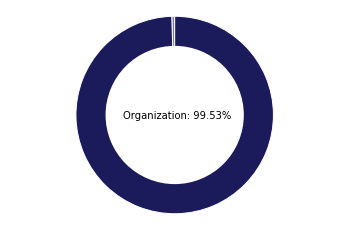

In [21]:
#@title Interactive Account Type Classification(Organization vs. Individual)
#@markdown Enter the Twitter account screen name that you want classify.

AccountScreenName = "un" #@param {type:"string"}
prediction_str, proba, name, bio, location, url = mh.predict(AccountScreenName)
print('Account Name: {}\nUser Name: {}\nBio: {}\nLocation: {}\nUrl: {}\nPrediction: {}\nProbability: {}'
      .format(AccountScreenName, name, bio, location, url, prediction_str, proba))

%matplotlib inline
import matplotlib.pyplot as plt

# create donut plots
startingRadius = 0.5
scenario = prediction_str
percentage = 100*proba
textLabel = "{}: {:.2f}%".format(scenario, percentage)
remainingPie = 100 - percentage

colors = ['#fba7ab', '#7d151a'] if prediction_str == 'Individual' else ['#7d7dad', '#1b1b5c']

donut_sizes = [remainingPie, percentage]

plt.text(0.01, startingRadius - 0.5, textLabel, horizontalalignment='center', verticalalignment='center')
plt.pie(donut_sizes, radius=startingRadius, startangle=90, colors=colors,
        wedgeprops={"edgecolor": "white", 'linewidth': 1})


# equal ensures pie chart is drawn as a circle (equal aspect ratio)
plt.axis('equal')

# create circle and place onto pie chart
circle = plt.Circle(xy=(0, 0), radius=0.35, facecolor='white')
plt.gca().add_artist(circle)
plt.savefig('donutPlot.jpg')
plt.show()